In [1]:
from self_supervised_halos.utils.utils import data_preprocess_path, check_cuda
from scripts.classification_2d import ClassificationModel, report_classification_performance

from self_supervised_halos.utils.dataloader import HaloDataset, img2d_transform, subhalos_df, DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

device = check_cuda()

Running on local machine
matplotlib settings set
CUDA is not available.
Device: cpu


In [ ]:
dataset = HaloDataset(root_dir=data_preprocess_path,subhalos_df=subhalos_df, 
                      load_2d=True, load_3d=False, load_mass=False,
                        choose_two_2d = False,
                      DEBUG_LIMIT_FILES = None)


In [54]:

if device=='cpu':
    batch_size = 128
else:
    print('dataloader on gpu')
    batch_size = 512

print(f'Batch size: {batch_size}')

n_data = len(dataset)
f_train = 0.6
f_val = 0.2
f_test = 1 - f_train - f_val


train_size = int(f_train*len(dataset))
val_size = int(f_val*len(dataset))
test_size = len(dataset) - train_size - val_size


trainval_ds, test_ds = torch.utils.data.random_split(dataset, [train_size+val_size, test_size])
train_size = int(f_train/(f_train+f_val)*len(trainval_ds))
val_size = len(trainval_ds) - train_size

train_ds, val_ds = torch.utils.data.random_split(trainval_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True)


Batch size: 128


In [71]:
lr = 1e-3
n_epochs=10


criterion = nn.CrossEntropyLoss(weight=dataset.mass_bins_weights.to(device)).to(device)

model = ClassificationModel(
                    optimizer_class=torch.optim.Adam,
                    optimizer_params={'lr':lr},
                    scheduler_class=torch.optim.lr_scheduler.StepLR,
                    scheduler_params={'step_size':10, 'gamma':0.5},
                    criterion=criterion,
                    history=None,
                    transform=img2d_transform,
)

model.load('Classification_2d.pth')

#model.trial_forward_pass(train_loader, device);

Model Classification_2d loaded at epoch 10


0.45402057965596515

In [72]:
model.training_loop(
    train_loader=train_loader, 
    val_loader=val_loader,
    num_epochs=n_epochs, 
    device=device)

Epoch 1/10 Training: 100%|██████████| 78/78 [00:05<00:00, 13.49it/s]


Epoch 1, Training Loss: 0.8155261064187075


Epochs:  10%|█         | 1/10 [00:07<01:03,  7.02s/it]

Epoch 1, Validation Loss: 0.6180983965213482


Epoch 2/10 Training: 100%|██████████| 78/78 [00:05<00:00, 13.65it/s]


Epoch 2, Training Loss: 0.6384790627620159


Epochs:  20%|██        | 2/10 [00:14<00:56,  7.08s/it]

Epoch 2, Validation Loss: 0.580017572412124


Epoch 3/10 Training: 100%|██████████| 78/78 [00:06<00:00, 12.60it/s]


Epoch 3, Training Loss: 0.6095766944762988


Epochs:  30%|███       | 3/10 [00:21<00:52,  7.43s/it]

Epoch 3, Validation Loss: 0.5954059866758493


Epoch 4/10 Training: 100%|██████████| 78/78 [00:08<00:00,  9.51it/s]


Epoch 4, Training Loss: 0.6503811528285345


Epochs:  40%|████      | 4/10 [00:31<00:49,  8.33s/it]

Epoch 4, Validation Loss: 0.530920630464187


Epoch 5/10 Training: 100%|██████████| 78/78 [00:05<00:00, 13.72it/s]


Epoch 5, Training Loss: 0.5654856467094177


Epochs:  50%|█████     | 5/10 [00:38<00:39,  7.93s/it]

Epoch 5, Validation Loss: 0.604548196379955


Epoch 6/10 Training: 100%|██████████| 78/78 [00:06<00:00, 12.10it/s]


Epoch 6, Training Loss: 0.6039766199313678


Epochs:  60%|██████    | 6/10 [00:46<00:31,  7.87s/it]

Epoch 6, Validation Loss: 0.5887301277655822


Epoch 7/10 Training: 100%|██████████| 78/78 [00:05<00:00, 13.77it/s]


Epoch 7, Training Loss: 0.5962058336306841


Epochs:  70%|███████   | 7/10 [00:53<00:22,  7.51s/it]

Epoch 7, Validation Loss: 0.5502011420635077


Epoch 8/10 Training: 100%|██████████| 78/78 [00:05<00:00, 13.62it/s]


Epoch 8, Training Loss: 0.569939802472408


Epochs:  80%|████████  | 8/10 [01:00<00:14,  7.43s/it]

Epoch 8, Validation Loss: 0.5795521151561004


Epoch 9/10 Training: 100%|██████████| 78/78 [00:06<00:00, 12.79it/s]


Epoch 9, Training Loss: 0.5632697970439227


Epochs:  90%|█████████ | 9/10 [01:07<00:07,  7.39s/it]

Epoch 9, Validation Loss: 0.5569038952772434


Epoch 10/10 Training: 100%|██████████| 78/78 [00:08<00:00,  9.67it/s]


Epoch 10, Training Loss: 0.5634591059807019


Epochs: 100%|██████████| 10/10 [01:17<00:00,  7.72s/it]

Epoch 10, Validation Loss: 0.6281533149572519


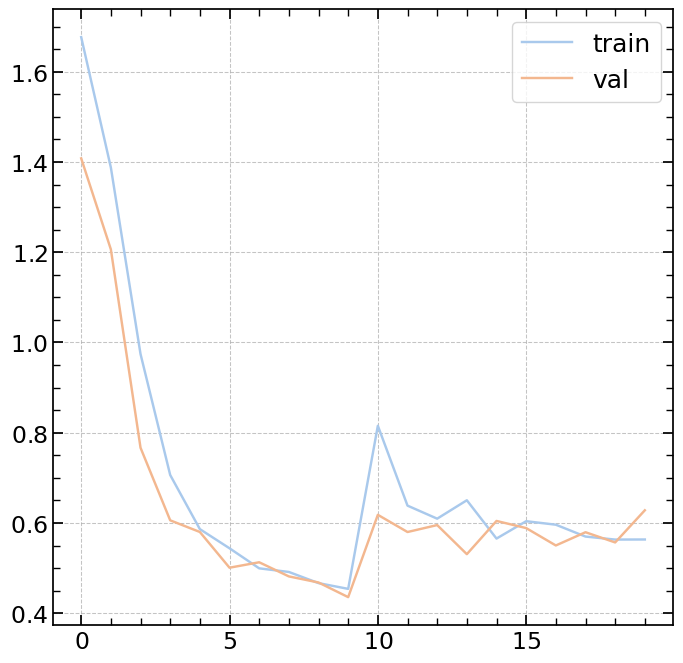

In [73]:
%matplotlib inline
plt.plot(model.history['train_loss'], label='train')
plt.plot(model.history['val_loss'], label='val')
plt.legend()
plt.show()

Trial Forward Pass:   0%|          | 0/78 [00:00<?, ?it/s]

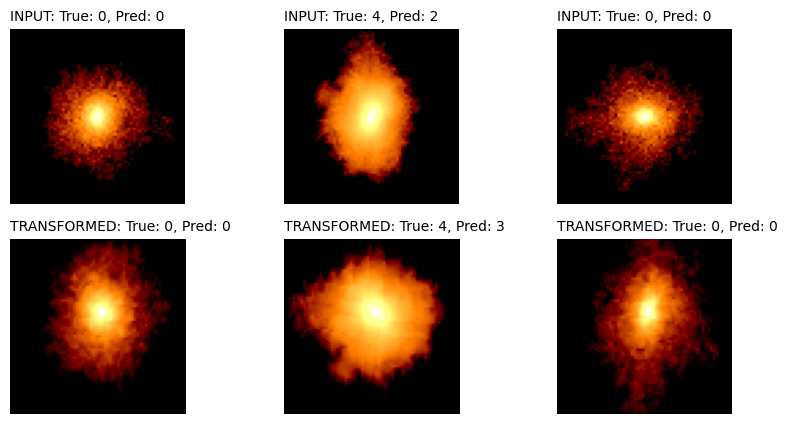

Trial Forward Pass:   0%|          | 0/78 [00:00<?, ?it/s]


In [75]:
model.show_transforms(train_loader, device);

In [76]:
#test saving
model.save()

Model Classification_2d saved at epoch 20


In [77]:
model.history

{'train_loss': [1.6766605423046992,
  1.387777233735109,
  0.9744245081375806,
  0.7063914835453033,
  0.5864299386739731,
  0.5439443905384113,
  0.49951671789854,
  0.491500511383399,
  0.4667846377079303,
  0.45402057965596515,
  0.8155261064187075,
  0.6384790627620159,
  0.6095766944762988,
  0.6503811528285345,
  0.5654856467094177,
  0.6039766199313678,
  0.5962058336306841,
  0.569939802472408,
  0.5632697970439227,
  0.5634591059807019],
 'val_loss': [1.408042481312385,
  1.206321005637829,
  0.7667456498512855,
  0.6059206483455805,
  0.5800779037750684,
  0.5009123728825495,
  0.5129844305606989,
  0.48165194346354556,
  0.46815115671891433,
  0.4357023754945168,
  0.6180983965213482,
  0.580017572412124,
  0.5954059866758493,
  0.530920630464187,
  0.604548196379955,
  0.5887301277655822,
  0.5502011420635077,
  0.5795521151561004,
  0.5569038952772434,
  0.6281533149572519],
 'learning_rate': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
 

Classification Performance: 26it [00:00, 26.82it/s]
Classification Performance: 0it [00:00, ?it/s]


pred_class,0,1,2,3,4,5,6,All
true_class,,,,,,,,
0,1807,2,0,0,0,0,0,1809
1,568,224,0,0,0,0,0,792
2,6,262,96,0,0,0,0,364
3,1,7,155,30,0,0,0,193
4,0,0,9,75,4,0,0,88
5,0,0,0,27,12,3,0,42
6,0,0,0,1,7,1,1,10
7,0,0,0,0,6,0,1,7
8,0,0,0,0,2,0,1,3


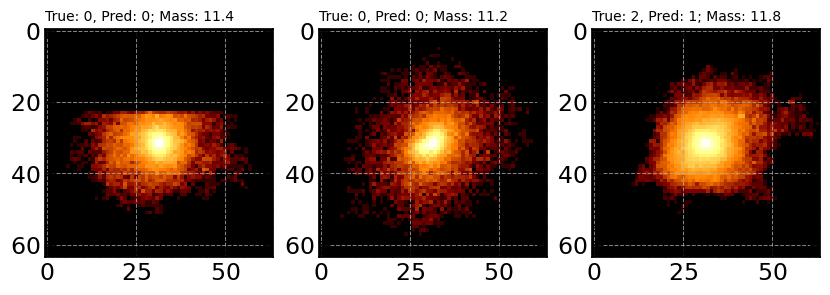

In [78]:
result_df = report_classification_performance(model, val_loader, device=device)
report_classification_performance(model, val_loader, device=device, viz_one = True)

pd.crosstab(result_df['true_class'], result_df['pred_class'], margins=True)


Classification Performance: 26it [00:00, 30.77it/s]
Classification Performance: 0it [00:00, ?it/s]


pred_class,0,1,2,3,4,5,6,All
true_class,,,,,,,,
0,1756,0,0,0,0,0,0,1756
1,578,275,0,0,0,0,0,853
2,4,290,97,1,0,0,0,392
3,0,9,141,29,0,0,0,179
4,0,0,11,59,6,0,0,76
5,0,0,0,15,14,1,0,30
6,0,0,0,1,13,1,0,15
7,0,0,0,0,3,2,1,6
8,0,0,1,0,0,1,0,2


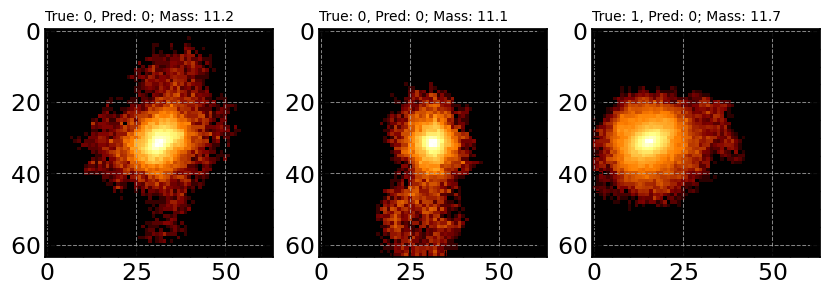

In [79]:
result_df_test = report_classification_performance(model, test_loader, device=device)
report_classification_performance(model, test_loader, device=device, viz_one = True)

pd.crosstab(result_df_test['true_class'], result_df_test['pred_class'], margins=True)
